<a href="https://colab.research.google.com/github/j23-cs167/project-2-erinmcmullen/blob/main/McMullen_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Points Attempted
#####1: Problem: 2/2 
#####2: Data Prep: 2/2 
#####3: Research: 9/10
#####4: Analysis: 10/10
#####5: Bumps in the Road: 1/1
#####Total: 24/25

# Project #2
##Name: Erin McMullen

Proposed Points (out of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

**The data I am using consists of pictures of flowers. There are 5 different types of flowers including daisies, dandelions, roses, sunflowers, and tuplips. I got the data from kaggle and I am trying to create this machine learning experiment to predict what type of flower it is out of the 5 listed above.**

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

**My data was already somewhat organized when I downloaded it and was separated into train data and test data. The train data was sorted into the 5 classes, but the test data was not, so I went through and sorted the test data into 5 classes. So, I didn't have to do much to prepare my data except sort enough of the test data into classes, upload it to my drive, and load it into colab. I am certain my data is clean and prepared for use because it is just images so I don't have to worry about missing data and they are all classified into one of the 5 classes.**

In [17]:
# load and prepare your data here
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [3]:
import keras
import tensorflow 
print ("TensorFlow version: " + tensorflow.__version__)
print ("Keras version: " + keras.__version__)

TensorFlow version: 2.9.2
Keras version: 2.9.0


In [4]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
import keras
import sys
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
import sys

In [6]:
# dimensions of our images.
img_width = 200
img_height = 200

#the directories where our train and test data is
train_data_dir = '/content/drive/MyDrive/Datasets/Flower_Dataset/train'
test_data_dir = '/content/drive/MyDrive/Datasets/Flower_Dataset/test'  

batch_size = 32

# 3. Research

Put your code and your experiments here.

In [7]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

In [8]:
datagen = ImageDataGenerator(rescale=1.0/300.0)

train_data = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

test_data = datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='binary')

Found 2746 images belonging to 5 classes.
Found 113 images belonging to 5 classes.


In [9]:
#Model 1
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(Flatten()) #flatten the convolutional layer so it can go into a fully-connected layer
model.add(Dense(32)) #fully-connected layer
model.add(Dense(1,activation='sigmoid'))

# Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [10]:
#Train the Model
training_results = model.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=5, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/5
86/86 [==============================] - 763s 9s/step - loss: nan - accuracy: 0.1897 - val_loss: nan - val_accuracy: 0.2035
Epoch 2/5
86/86 [==============================] - 14s 160ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 3/5
86/86 [==============================] - 14s 158ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 4/5
86/86 [==============================] - 15s 175ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 5/5
86/86 [==============================] - 15s 179ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035


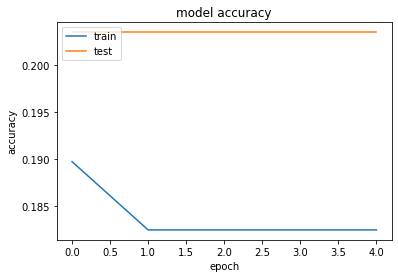

In [11]:
# Graph of Model 1 train vs test 
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results.history['accuracy'])
plt.plot(training_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
#Model 2
model2 = Sequential()
model2.add(Conv2D(32, (4, 4), activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(64, (3, 3),activation = 'relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(64,activation = 'relu'))
model2.add(Dense(1,activation='sigmoid'))


# Compile Model
opt = SGD(lr=0.001, momentum=0.9)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
#Train Model 2
training_results2 = model2.fit_generator(
        train_data, #training set
        steps_per_epoch = len(train_data), 
        epochs=20, #number of epochs 
        validation_data = test_data, #testing set
        validation_steps = len(test_data)
        )

Epoch 1/20
86/86 [==============================] - 13s 153ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 2/20
86/86 [==============================] - 13s 150ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 3/20
86/86 [==============================] - 13s 151ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 4/20
86/86 [==============================] - 13s 151ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 5/20
86/86 [==============================] - 13s 151ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 6/20
86/86 [==============================] - 13s 150ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 7/20
86/86 [==============================] - 13s 149ms/step - loss: nan - accuracy: 0.1824 - val_loss: nan - val_accuracy: 0.2035
Epoch 8/20
86/86 [=======================

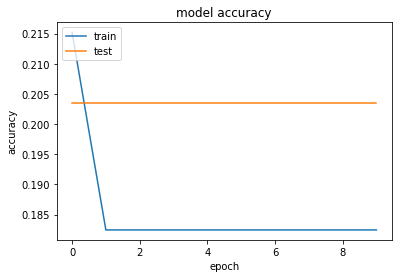

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training_results2.history['accuracy'])
plt.plot(training_results2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

**What I discoverd in my project was that the model couldnt train very well, since it wasn't very accurate. It ended up with an accuracy of .2035. My first and second model were the same even with the changes I made to the second model. Neither of my models worked the best, so I think it had more to do with my data than my model. I think I got these results because these 5 types of flowers can look similar in some instances, so I think it got them mixed up which messed up the accuracy.**

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

**The first bump in the road I hit was with my data because I thought it would be a good dataset to download and i downloaded it and uploaded it, but the test data wasn't organized into the 5 classes like the train data was. So, I had to take the time and split up the data into the 5 classes which was a little time consuming. While doing the research part of this project I was trying to create a model with a high accuracy, but it seemed that with anything i changed the accuracy just stayed the same or got lower. I think overall the data just wasn't the best and it was also probably hard to determine between 5 classes. If I had to change it for next time I would probably consider only using 2 classes and hopefully it would be more accurate.**